# Project: Regression Modeling with the Boston Housing Dataset

## Introduction

In this final lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the famous "Boston Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Build many linear models with the Boston housing data using OLS
* Analyze OLS diagnostics for model validity 
* Visually explain the results and interpret the diagnostics from Statsmodels 
* Comment on the goodness of fit for a simple regression model

## Let's get started

### Import necessary libraries and load 'BostonHousing.csv' as a pandas dataframe

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
import numpy as np

# Your code here
bh_df = pd.read_csv('BostonHousing.csv')
bh_df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The columns in the Boston housing data represent the dependent and independent variables. The dependent variable here is the median house value `MEDV`. The description of the other variables is available on [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

In [67]:
bh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [68]:
bh_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [69]:
# Record your observations here 
# There are 506 records in this dataframe with 14 different variables pertaining to the housing
# market.  Most variables values are floats with a couple of int exceptions.  Most variables 
# are continuous with a couple of discrete ones.  The medv is for median value of homes --
# our target variable.  

### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

In [70]:
bh_df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

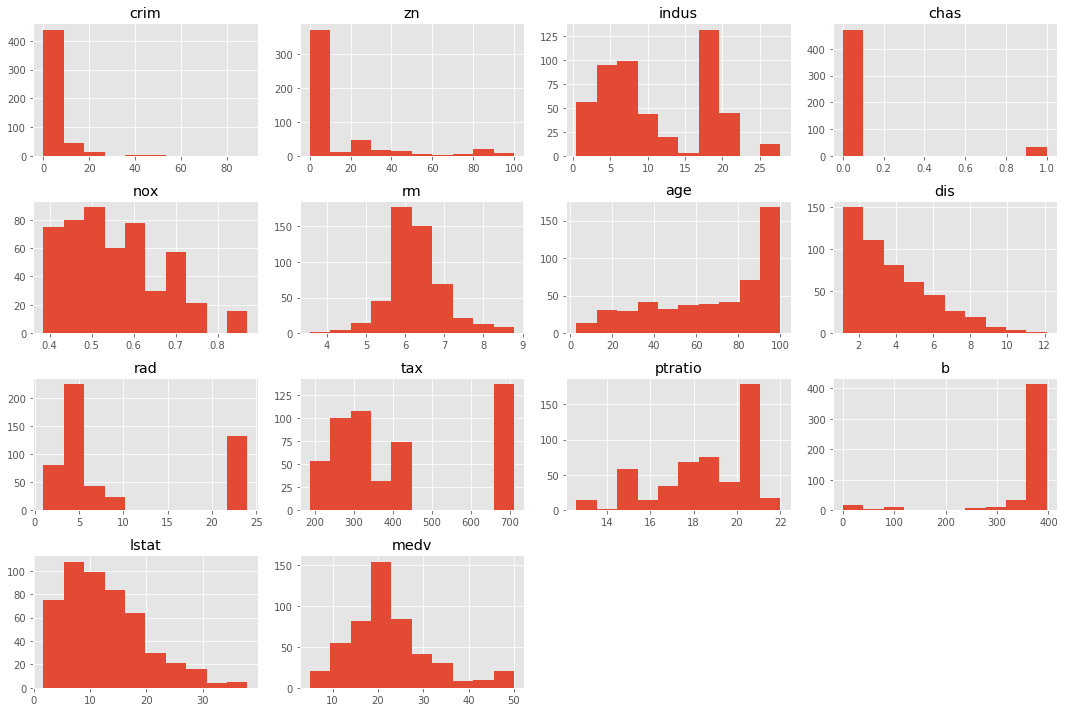

In [71]:
fig = plt.figure(figsize=(15,10))
plt.style.use('ggplot')
pltnum = 1

for col in bh_df.columns:
    ax = fig.add_subplot(4,4,pltnum)
    ax.hist(bh_df[col], bins=10)
    ax.set_title(col)
    pltnum += 1
    
plt.tight_layout()
plt.show()

In [72]:
# You observations here 
# The variable distributions exhibit a variety of different shapes.  Some appear normal such
# as median value, lower status, average number rooms, and nitrogen oxide concentrations. Some
# are very skewed and many have dominant bins. Discrete variables such as radial highway index
# and charles river have expected distributions. 

Based on this, we preselected some features  for you which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

In [73]:
normbh_df = bh_df.loc[:,['crim', 'dis','rm','zn','age','medv']]
normbh_df.head()

,crim,dis,rm,zn,age,medv
0,0.00632,4.0900,6.575,18.0,65.2,24.0
1,0.02731,4.9671,6.421,0.0,78.9,21.6
2,0.02729,4.9671,7.185,0.0,61.1,34.7
3,0.03237,6.0622,6.998,0.0,45.8,33.4
4,0.06905,6.0622,7.147,0.0,54.2,36.2


### Check for linearity assumption for all chosen features with target variable using scatter plots

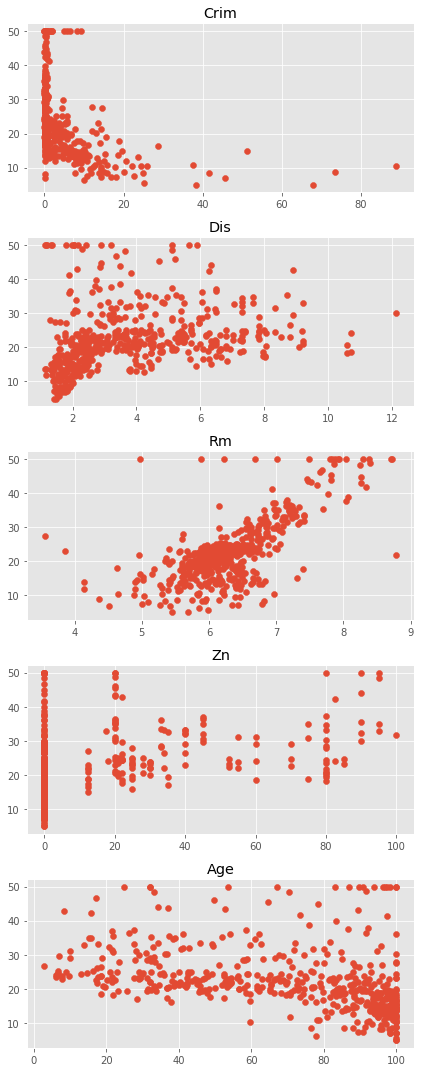

In [74]:
# Your code here 
fig1 = plt.figure(figsize=(6,15))
pltnum = 1

for col in normbh_df.columns[:5]:
    ax = fig1.add_subplot(5,1,pltnum)
    ax.scatter(normbh_df[col],normbh_df['medv'])
    ax.set_title(col.title())
    pltnum += 1
    

plt.tight_layout()    
plt.show()    


In [75]:
# Your observations here 
# The five feature variable seem to all show at least some linearity with the target variable
# median value.  Crime and age seem to have a negative correlation with the target and land
# zoned for over 25k sqft, average number of rooms, and distance from employment centers seem
# to have positive correlation with median home values.  There seems to be many dominant values
# that may have to be dealt with for modeling and prediction to be effective.

Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll the dataset untouched and just move on with the regression. The assumptions are _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~crim
-----------------------------------------------------------------------------------


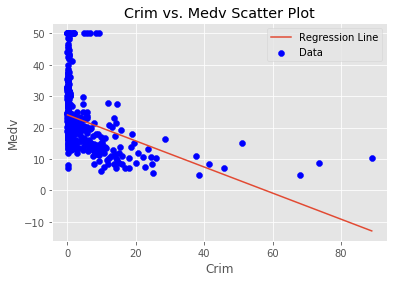

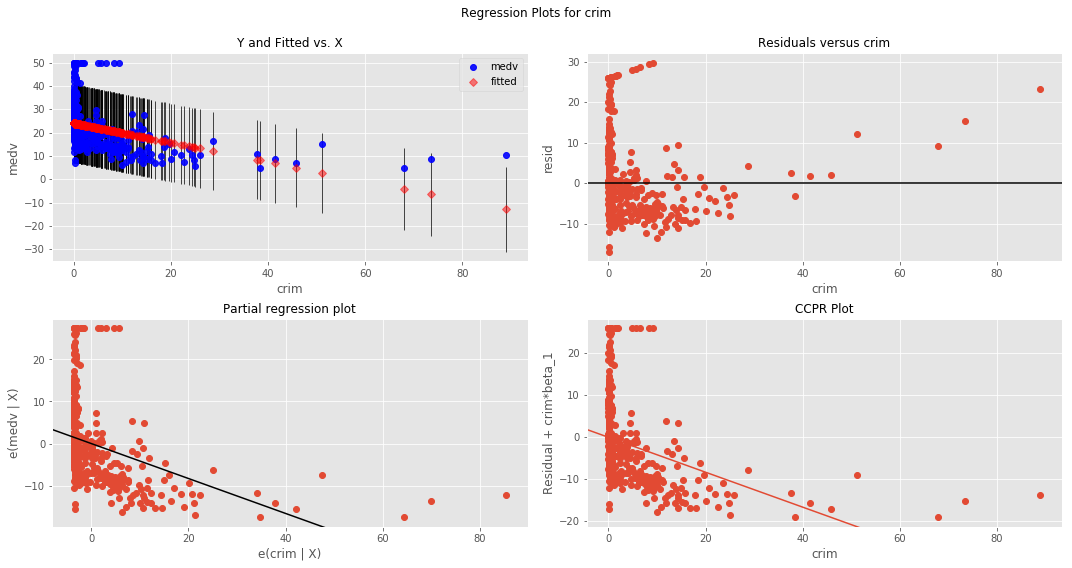

<Figure size 432x288 with 0 Axes>

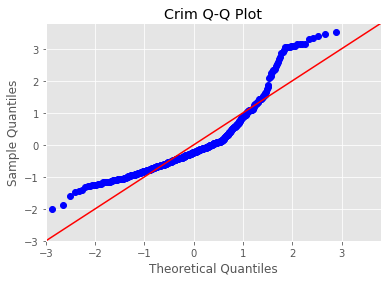

Press enter to continue: 
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~dis
-----------------------------------------------------------------------------------


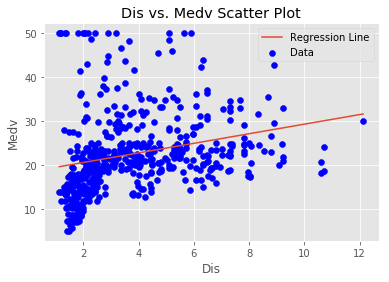

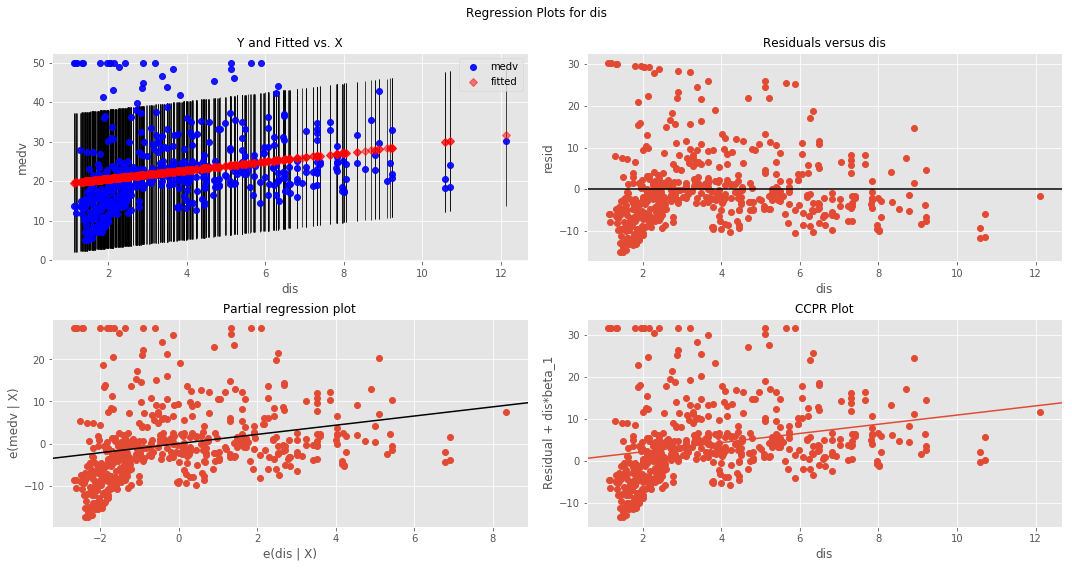

<Figure size 432x288 with 0 Axes>

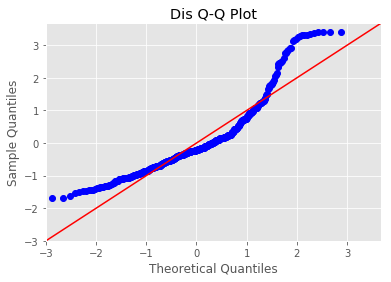

Press enter to continue: 
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~rm
-----------------------------------------------------------------------------------


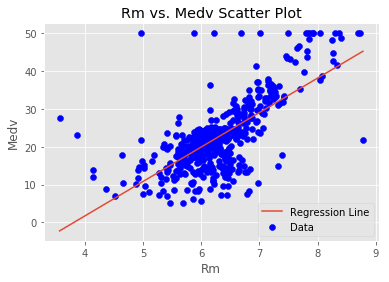

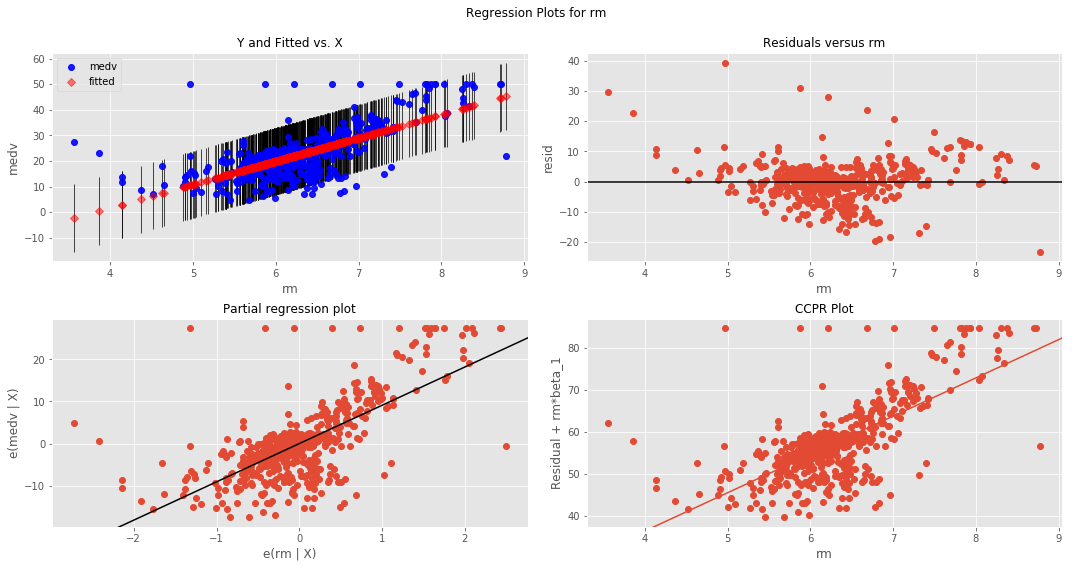

<Figure size 432x288 with 0 Axes>

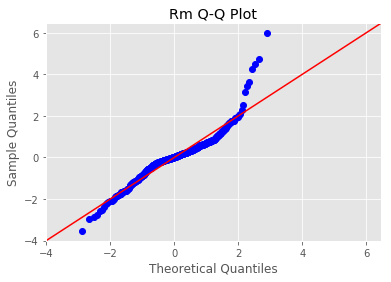

Press enter to continue: 
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~zn
-----------------------------------------------------------------------------------


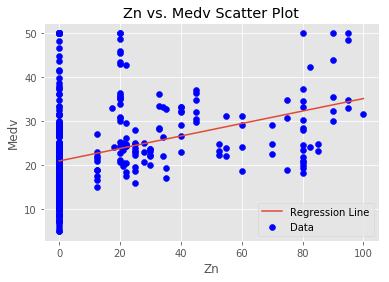

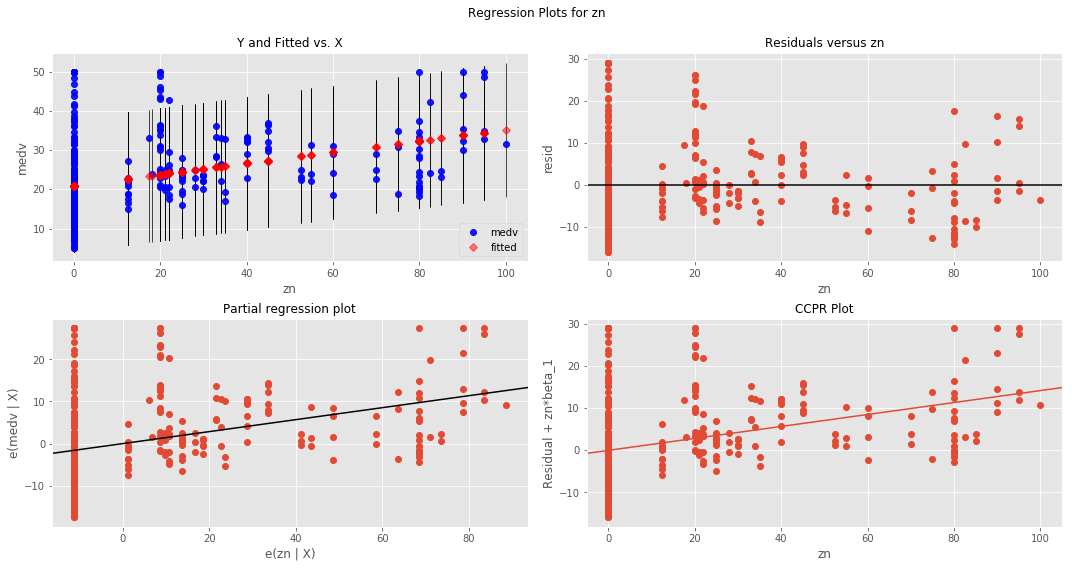

<Figure size 432x288 with 0 Axes>

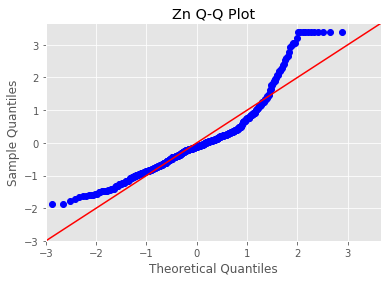

Press enter to continue: 
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~age
-----------------------------------------------------------------------------------


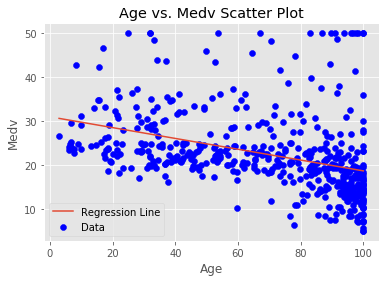

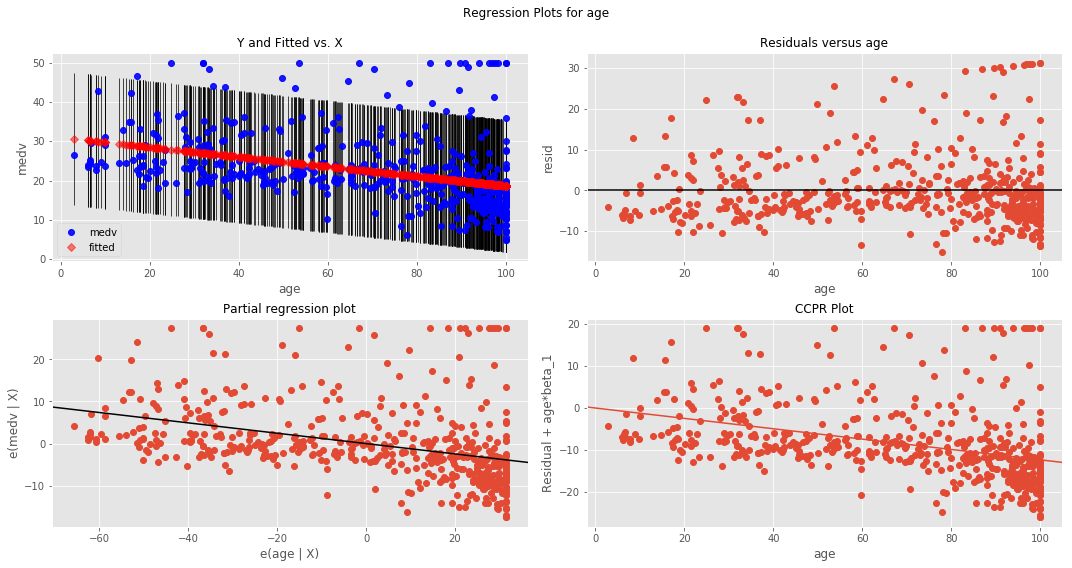

<Figure size 432x288 with 0 Axes>

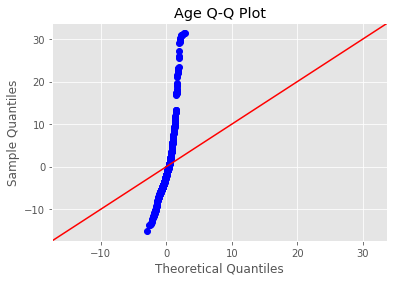

Press enter to continue: 


In [104]:
results = [['ind_var', 'r_squared', 'intercept', 'slope' ,'p-value', 'normality (JB)']]

for col in normbh_df.columns[:5]:

    #Run regression analysis and fit model and add results to nested list
    f = 'medv~'+ col
    model = smf.ols(formula=f, data=normbh_df).fit()
    rsquared = model.rsquared
    b,m = model.params
    pval = model.f_pvalue
    jb = sms.jarque_bera(model.resid)[0]
    
    results.append([col, rsquared, b, m, pval, jb])
    
    print('Boston Housing DataSet - Regression Analysis and Diagnostics for formula:', f)
    print('-----------------------------------------------------------------------------------')
    
    #Plot scatter plot and regression line
    regxs = np.array([normbh_df[col].min(), normbh_df[col].max()])
    regys = regxs*m + b
    plt.scatter(normbh_df[col], normbh_df['medv'], color='b', label='Data')
    plt.plot(regxs, regys, label='Regression Line')
    plt.title(col.title()+' vs. Medv Scatter Plot')
    plt.ylabel('Medv')
    plt.xlabel(col.title())
    plt.legend()
    plt.show()
    
    #Plot Residuals
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    plt.show()
    
    #Plot Q-Q plot for normality check
    residuals = model.resid
    fig1 = plt.figure()
    fig1 = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    plt.title(col.title()+' Q-Q Plot')
    plt.show()
    
    string = input('Press enter to continue: ')
    
    
    
    
    
    

In [106]:
pd.DataFrame(results)

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,crim,0.15078,24.0331,-0.41519,1.17399e-19,295.404
2,dis,0.0624644,18.3901,1.09161,1.20661e-08,305.104
3,rm,0.483525,-34.6706,9.10211,2.48723e-74,612.449
4,zn,0.129921,20.9176,0.14214,5.71358e-17,262.387
5,age,0.142095,30.9787,-0.123163,1.56998e-18,456.983


In [107]:
#Your observations here 
# As expected, crime rate and age are inversely associated with home value while distance from
# employment center, number of rooms, and land zoned for large properties are directly
# associated to home values.  Statistical inference using these linear models, however, will
# be weak due to the low r-squared values.  At most, the most reliable predictor's model (rm)
# accounts for only 48% of the respective change in home value.  Each of the models' p-values
# are lower than even the smallest of significance values which can be interpreted that the
# null hypothesis of where the feature variable and the target variable have no correlation
# can be rejected.  This shows that fitting models can show evidence of correlation even if the
# model predictive power may be low. 

Clearly, the results are not very reliable. The best R-Squared is witnessed with `rm`, so in this analysis, this is uour best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore at multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

![](images/joke.png)

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.